In [17]:
#this program will only work zumi python library 1.2
#TODO: Need to fix the index since i added mpu temp to 17; shift everything
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display

zumi = Zumi()
zumi.reset_gyro()

zumi.MIN_I2C_DELAY = 0.0
zumi.MAX_USER_SPEED = 127

def column(column_number, matrix):
    return [row[column_number] for row in matrix]

temp_data = zumi.get_all_sensor_data()

print("number of items in list ",len(temp_data))
print("time samples taken ",temp_data[0])
print("ir values ",temp_data[1:7])
print("batt volt detected",temp_data[7])
print("vcc volt ",temp_data[8])
print("version on board ",temp_data[9])
print("user def variable ",temp_data[10])

print("x acc ",temp_data[11])
print("y acc ",temp_data[12])
print("z acc ",temp_data[13])

print("x ang speed ",temp_data[14])
print("y ang speed ",temp_data[15])
print("z ang speed ",temp_data[16])

print("mpu temp ",temp_data[17])

print("x ang ",temp_data[18])
print("y ang ",temp_data[19])
print("z ang ",temp_data[20])


print("x ang from acc ",temp_data[21])
print("y ang from acc ",temp_data[22])

print("x complementary ang ",temp_data[23])
print("y complementary ang ",temp_data[24])


print("rot x ang ",temp_data[25])
print("rot y ang ",temp_data[26])
print("rot z ang ",temp_data[27])

print("tilt orientation ",temp_data[28])

print("x mag ",temp_data[29])
print("y mag ",temp_data[30])
print("z mag ",temp_data[31])
print("mag temp ",temp_data[32])

print("mag bearing ",temp_data[33])

 Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
number of items in list  34
time samples taken  1583983433.6964726
ir values  [243, 154, 226, 142, 235, 247]
batt volt detected 4.0
vcc volt  5.083333333333334
version on board  1.2
user def variable  0
x acc  0.09814453125
y acc  -0.00341796875
z acc  0.9951171875
x ang speed  0.0999790756201997
y ang speed  0.14296635918992362
z ang speed  -0.06040993666121863
mpu temp  32.48294117647059
x ang  0.00087300149572234
y ang  0.0012483596656255155
z ang  -0.00052749002463352
x ang from acc  -0.1967953284599591
y ang from acc  -5.632643531718649
x complementary ang  -0.003080365103391289
y complementary ang  -0.11142947816205998
rot x ang  -0.0013388479518143689
rot y ang  -1.1038596527148594
rot z ang  89.44471012421663
tilt orientation  5
x mag  -973
y mag  915
z mag  3867
mag temp  940
mag beari

In [50]:
zumi.reset_gyro()
#zumi.mpu.calibrate_MPU(100)

time_out = 10
speed = 10
time_passed = 0

sensor_list = []

print("starting")

for i in range(50):
    sensor_list.append(zumi.get_all_sensor_data())
zumi.control_motors(-speed,speed)

for i in range(50):
    sensor_list.append(zumi.get_all_sensor_data())
    
zumi.stop()
for i in range(50):
    sensor_list.append(zumi.get_all_sensor_data())
    
init_time = time.time()

while(time_passed <= time_out):
    zumi.control_motors(speed,speed)
    current_time = time.time()
    time_passed = current_time-init_time
    sensor_list.append(zumi.get_all_sensor_data())
    
zumi.stop()

for i in range(50):
    sensor_list.append(zumi.get_all_sensor_data())
    
print("done")


starting
done


In [51]:
print("saving data")
file = open("all_sensor_data.txt", "a")

for val in sensor_list:
    for data_point in val:
        message = message + str(data_point) + " "
    message = message + "\n"
file.write(message)
file.close()
print("done saving data")

saving data
done saving data


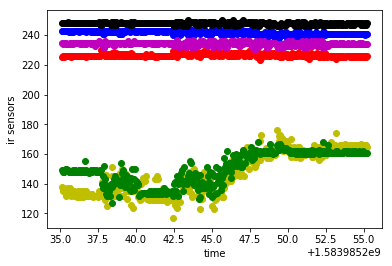

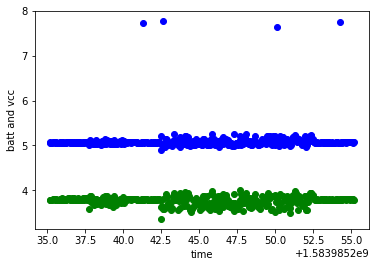

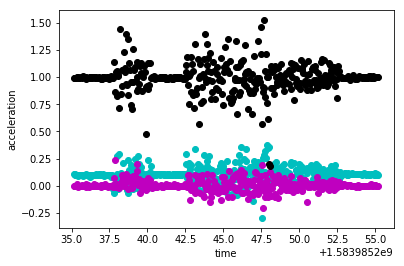

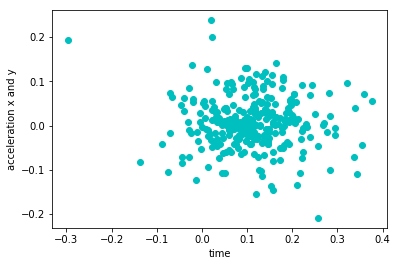

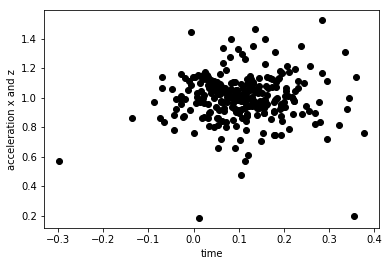

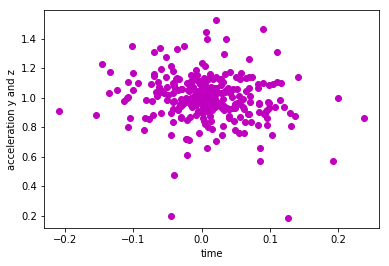

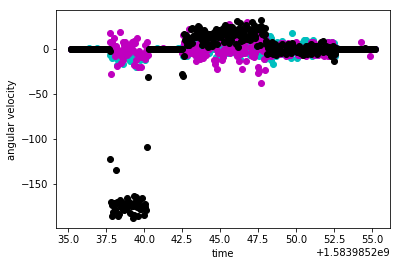

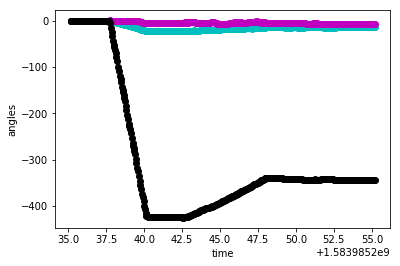

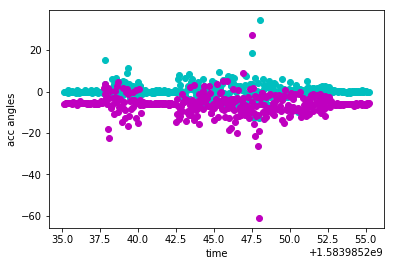

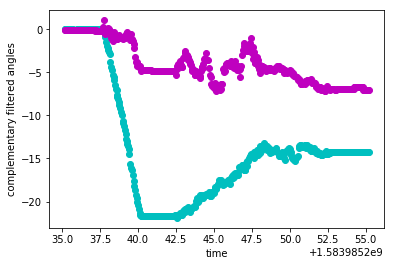

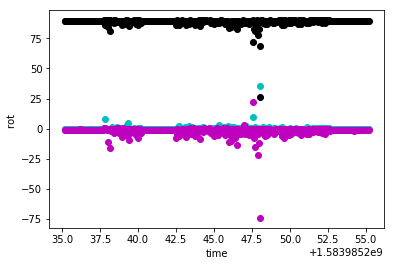

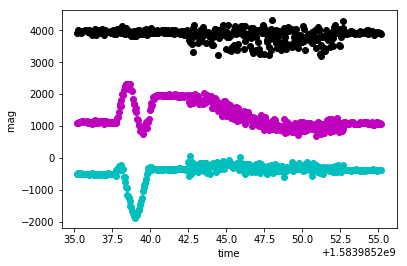

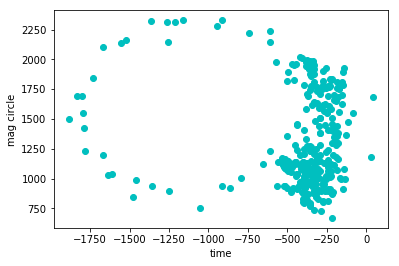

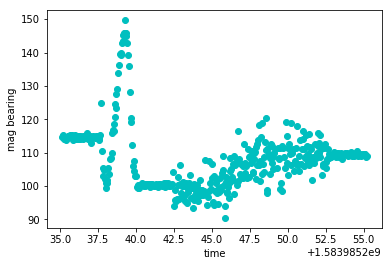

In [47]:
#0 time elapsed
#1-6 ir sensors
plt.plot(column(0,sensor_list),column(1,sensor_list),'bo',
         column(0,sensor_list),column(2,sensor_list),'yo',
         column(0,sensor_list),column(3,sensor_list),'ro',
         column(0,sensor_list),column(4,sensor_list),'go',
         column(0,sensor_list),column(5,sensor_list),'mo',
         column(0,sensor_list),column(6,sensor_list),'ko',)
plt.ylabel('ir sensors')
plt.xlabel('time')
plt.show()

#7 battery
#8 vcc rail
#9 version
#10 user defined
plt.plot(column(0,sensor_list),column(7,sensor_list),'go',
         column(0,sensor_list),column(8,sensor_list),'bo',)
plt.ylabel('batt and vcc')
plt.xlabel('time')
plt.show()


# print("x acc ",temp_data[11])
# print("y acc ",temp_data[12])
# print("z acc ",temp_data[13])


#11 acc x
#12 acc y
#13 acc z
plt.plot(column(0,sensor_list),column(11,sensor_list),'co',
         column(0,sensor_list),column(12,sensor_list),'mo',
         column(0,sensor_list),column(13,sensor_list),'ko',)
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()


plt.plot(column(11,sensor_list),column(12,sensor_list),'co')
plt.ylabel('acceleration x and y')
plt.xlabel('time')
plt.show()


plt.plot(column(11,sensor_list),column(13,sensor_list),'ko')
plt.ylabel('acceleration x and z')
plt.xlabel('time')
plt.show()

plt.plot(column(12,sensor_list),column(13,sensor_list),'mo')
plt.ylabel('acceleration y and z')
plt.xlabel('time')
plt.show()


#14 angv x
#15 angv y
#16 angv z
plt.plot(column(0,sensor_list),column(14,sensor_list),'co',
         column(0,sensor_list),column(15,sensor_list),'mo',
         column(0,sensor_list),column(16,sensor_list),'ko',)
plt.ylabel('angular velocity')
plt.xlabel('time')
plt.show()




# print("mpu temp ",temp_data[17])

# print("x ang ",temp_data[18])
# print("y ang ",temp_data[19])
# print("z ang ",temp_data[20])


plt.plot(column(0,sensor_list),column(18,sensor_list),'co',
         column(0,sensor_list),column(19,sensor_list),'mo',
         column(0,sensor_list),column(20,sensor_list),'ko',)
plt.ylabel('angles')
plt.xlabel('time')
plt.show()

# print("x ang from acc ",temp_data[21])
# print("y ang from acc ",temp_data[22])

plt.plot(column(0,sensor_list),column(21,sensor_list),'co',
         column(0,sensor_list),column(22,sensor_list),'mo',)
plt.ylabel('acc angles')
plt.xlabel('time')
plt.show()

# print("x complementary ang ",temp_data[23])
# print("y complementary ang ",temp_data[24])

plt.plot(column(0,sensor_list),column(23,sensor_list),'co',
         column(0,sensor_list),column(24,sensor_list),'mo',)
plt.ylabel('complementary filtered angles')
plt.xlabel('time')
plt.show()

# print("rot x ang ",temp_data[25])
# print("rot y ang ",temp_data[26])
# print("rot z ang ",temp_data[27])

plt.plot(column(0,sensor_list),column(25,sensor_list),'co',
         column(0,sensor_list),column(26,sensor_list),'mo',
         column(0,sensor_list),column(27,sensor_list),'ko',)
plt.ylabel('rot ')
plt.xlabel('time')
plt.show()

# print("tilt orientation ",temp_data[28])

# print("x mag ",temp_data[29])
# print("y mag ",temp_data[30])
# print("z mag ",temp_data[31])

plt.plot(column(0,sensor_list),column(29,sensor_list),'co',
         column(0,sensor_list),column(30,sensor_list),'mo',
         column(0,sensor_list),column(31,sensor_list),'ko',)
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

#x mag and y mag
plt.plot(column(29,sensor_list),column(30,sensor_list),'co')
plt.ylabel('mag circle')
plt.xlabel('time')
plt.show()

# print("mag temp ",temp_data[32])

# print("mag bearing ",temp_data[33])
plt.plot(column(0,sensor_list),column(33,sensor_list),'co')
plt.ylabel('mag bearing')
plt.xlabel('time')
plt.show()

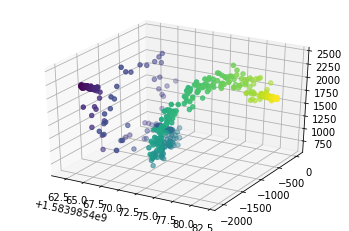

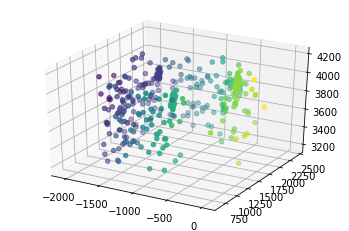

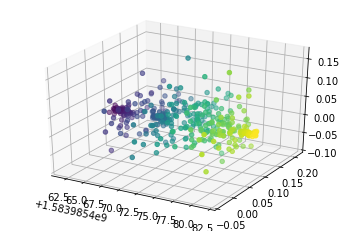

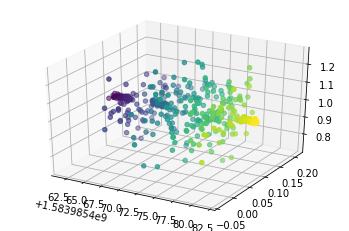

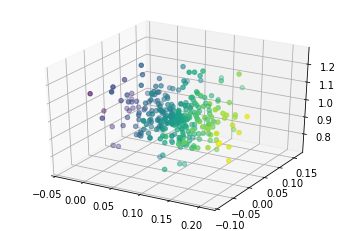

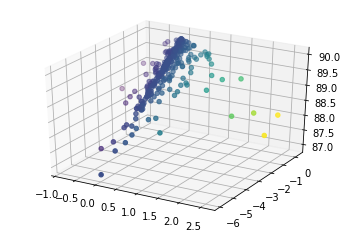

In [52]:
from mpl_toolkits.mplot3d import Axes3D

x = column(29,sensor_list)
y = column(30,sensor_list)
z = column(31,sensor_list)
t = column(0,sensor_list)
xa =column(11,sensor_list)
ya =column(12,sensor_list)
za =column(13,sensor_list)
xr =column(25,sensor_list)
yr =column(26,sensor_list)
zr =column(27,sensor_list)

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,x,y,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,c=x)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,xa,ya,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(t,xa,za,c=t)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xa,ya,za,c=xa)
plt.show()

fig= plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xr,yr,zr,c=xr)
plt.show()

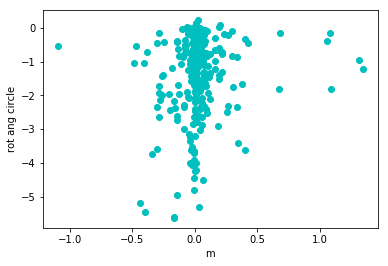

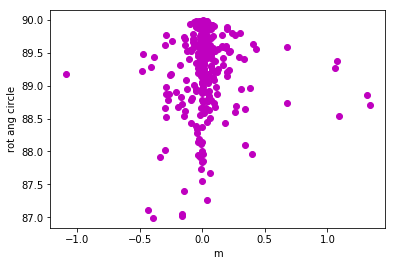

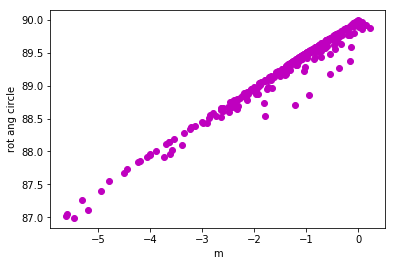

In [21]:
xr =column(25,sensor_list)
yr =column(26,sensor_list)
zr =column(27,sensor_list)

#x mag and y mag
plt.plot(xr,yr,'co')
plt.ylabel('rot ang circle')
plt.xlabel('m')
plt.show()

plt.plot(xr,zr,'mo')
plt.ylabel('rot ang circle')
plt.xlabel('m')
plt.show()

plt.plot(yr,zr,'mo')
plt.ylabel('rot ang circle')
plt.xlabel('m')
plt.show()